In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
n_rows = 2000
n_dim = 2
n_epochs = 500
np.random.seed(2)

In [3]:
k = np.random.uniform(-10, 10, n_dim)
p = np.random.randint(1, 3, n_dim)
k, p

(array([-1.28010196, -9.48147536]), array([1, 2]))

In [4]:
df = pd.DataFrame(columns=['x' + str(i) for i in range(1, n_dim + 1)] + ['y'], index = range(n_rows))
for i in range(n_rows):
    df.iloc[i, :-1] = np.random.uniform(-10, 10, n_dim)
    f = lambda x: sum((k[i] * x[i] ** p[i] for i in range(len(x))))
    df.at[i, 'y'] = f(df.iloc[i, :-1])
for col in df.columns:
    df[col] = df[col].astype('float32')
df

,x1,x2,y
0,-1.293552,-1.592644,-22.394024
1,-3.393304,-5.907027,-326.493073
2,2.385419,-4.006907,-155.281509
3,-4.663455,2.422677,-49.680515
4,0.582842,-7.308401,-507.177551
...,...,...,...
1995,-4.343675,-8.513006,-681.574341
1996,4.369024,6.076592,-355.696014
1997,9.014517,4.223886,-180.700470
1998,-8.488239,5.152899,-240.889786


<IPython.core.display.Javascript object>


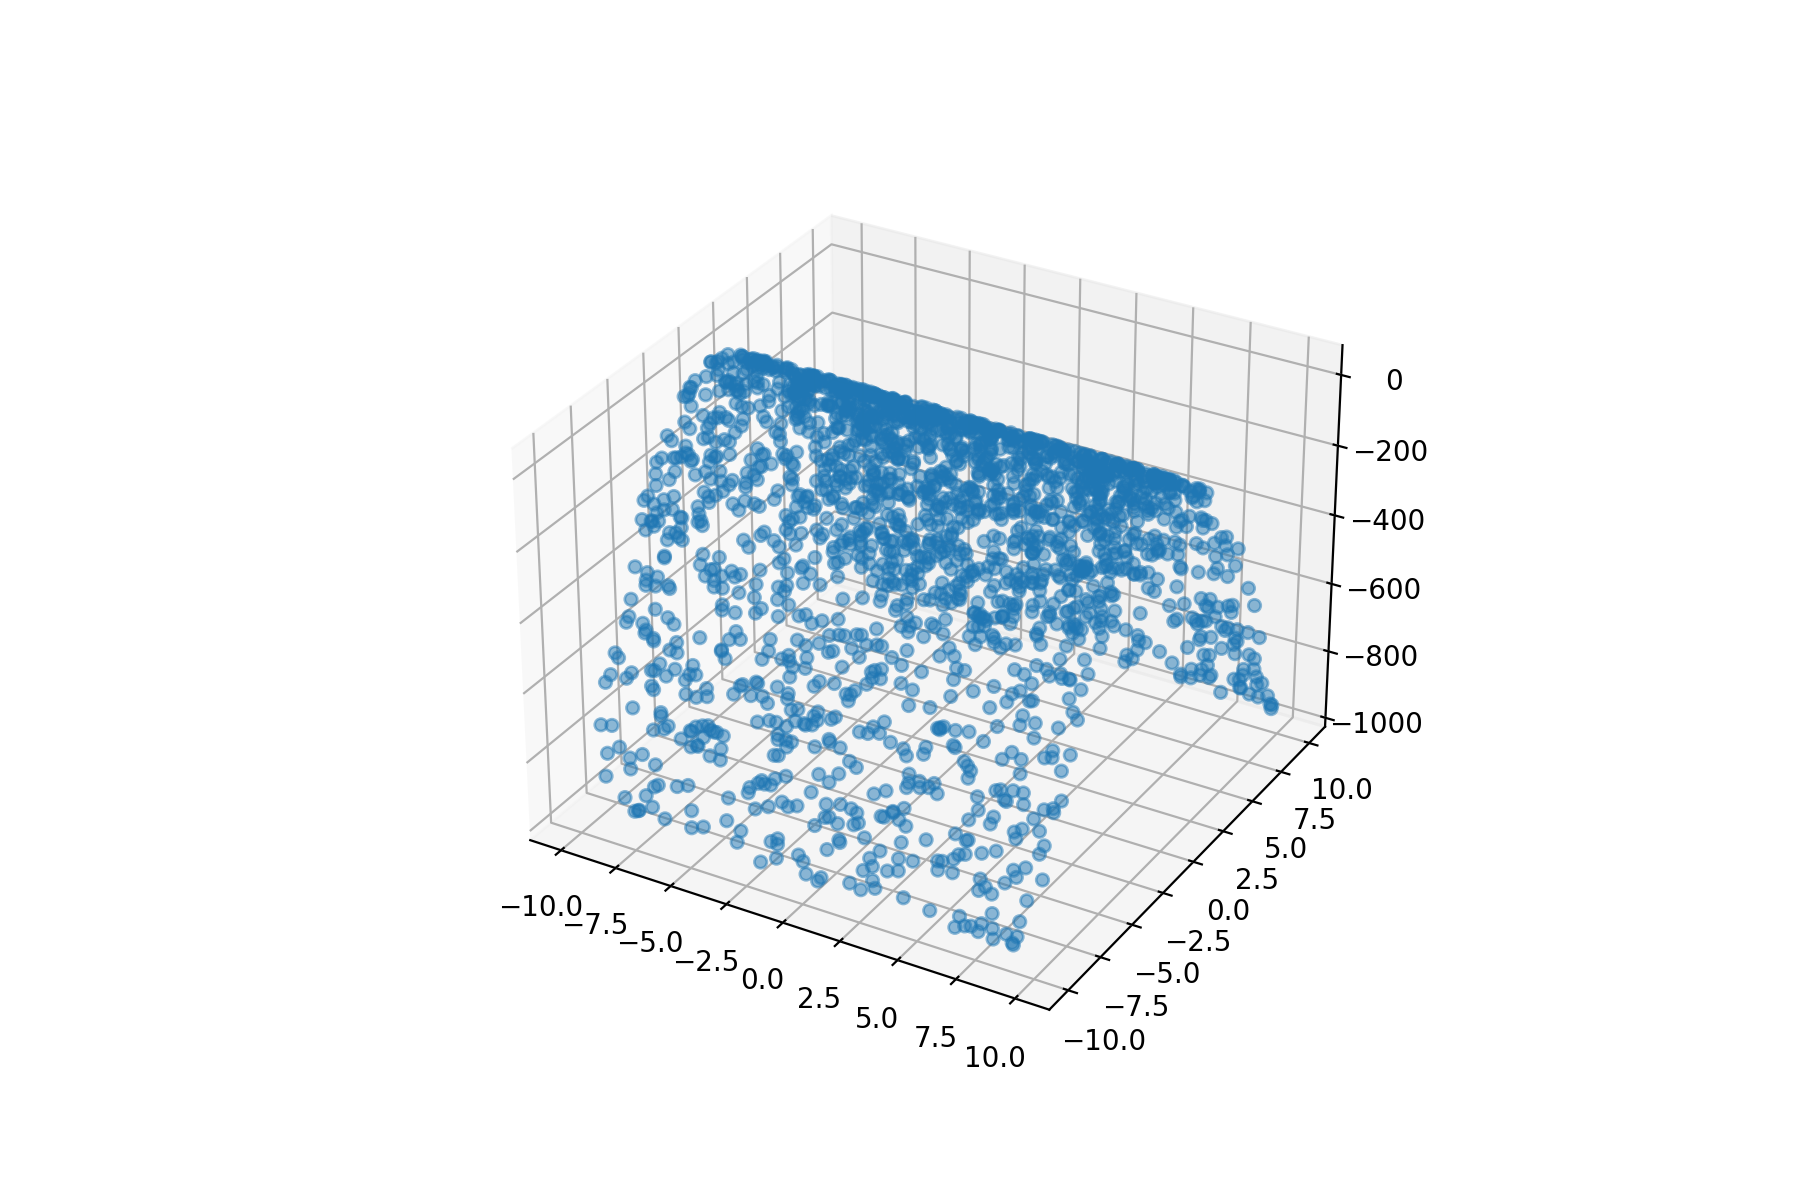

In [5]:
if n_dim == 2:
    ax = plt.figure(figsize=(9, 6)).add_subplot(projection='3d')
    ax.scatter(df['x1'], df['x2'], df['y'], alpha=0.5)
    plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]], 
                                                    df[df.columns[-1]],
                                                    test_size=0.5,
                                                    random_state=57)

In [7]:
model = Sequential([
    Dense(25, input_dim=n_dim, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=n_epochs)

Epoch 1/500
 1/32 [..............................] - ETA: 5s - loss: 107492.0000

2023-12-26 17:05:26.102619: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 2ms/step - loss: 180751.7344 - val_loss: 183899.8125
Epoch 2/500
32/32 [==============================] - 0s 956us/step - loss: 179808.5625 - val_loss: 182856.4844
Epoch 3/500
32/32 [==============================] - 0s 925us/step - loss: 178341.7031 - val_loss: 180732.6719
Epoch 4/500
32/32 [==============================] - 0s 969us/step - loss: 175803.1094 - val_loss: 177674.5312
Epoch 5/500
32/32 [==============================] - 0s 996us/step - loss: 172313.1094 - val_loss: 173546.6406
Epoch 6/500
32/32 [==============================] - 0s 917us/step - loss: 167782.9062 - val_loss: 168234.6562
Epoch 7/500
32/32 [==============================] - 0s 887us/step - loss: 161900.5156 - val_loss: 161473.3906
Epoch 8/500
32/32 [==============================] - 0s 939us/step - loss: 154358.7812 - val_loss: 153099.1562
Epoch 9/500
32/32 [==============================] - 0s 923us/step - loss: 145397.5469 - val_loss: 142928.1875
Epoch 10/500
32

32/32 [==============================] - 0s 959us/step - loss: 5738.0454 - val_loss: 6152.8940
Epoch 77/500
32/32 [==============================] - 0s 907us/step - loss: 5643.3970 - val_loss: 6046.6367
Epoch 78/500
32/32 [==============================] - 0s 879us/step - loss: 5593.2759 - val_loss: 5947.2515
Epoch 79/500
32/32 [==============================] - 0s 886us/step - loss: 5493.7290 - val_loss: 5854.7891
Epoch 80/500
32/32 [==============================] - 0s 872us/step - loss: 5396.3184 - val_loss: 5799.5928
Epoch 81/500
32/32 [==============================] - 0s 878us/step - loss: 5331.7275 - val_loss: 5723.4375
Epoch 82/500
32/32 [==============================] - 0s 893us/step - loss: 5272.6074 - val_loss: 5625.5220
Epoch 83/500
32/32 [==============================] - 0s 933us/step - loss: 5200.3857 - val_loss: 5562.4814
Epoch 84/500
32/32 [==============================] - 0s 897us/step - loss: 5134.1079 - val_loss: 5491.0815
Epoch 85/500
32/32 [=====================

32/32 [==============================] - 0s 895us/step - loss: 1993.5789 - val_loss: 2026.4507
Epoch 227/500
32/32 [==============================] - 0s 916us/step - loss: 1988.2032 - val_loss: 1996.9789
Epoch 228/500
32/32 [==============================] - 0s 919us/step - loss: 1965.4421 - val_loss: 1971.7190
Epoch 229/500
32/32 [==============================] - 0s 886us/step - loss: 1945.0769 - val_loss: 1961.2778
Epoch 230/500
32/32 [==============================] - 0s 898us/step - loss: 1927.8263 - val_loss: 1949.9705
Epoch 231/500
32/32 [==============================] - 0s 909us/step - loss: 1919.8503 - val_loss: 1930.9182
Epoch 232/500
32/32 [==============================] - 0s 907us/step - loss: 1897.3793 - val_loss: 1935.0648
Epoch 233/500
32/32 [==============================] - 0s 890us/step - loss: 1891.4775 - val_loss: 1895.1368
Epoch 234/500
32/32 [==============================] - 0s 915us/step - loss: 1870.9440 - val_loss: 1889.5051
Epoch 235/500
32/32 [============

32/32 [==============================] - 0s 898us/step - loss: 412.1924 - val_loss: 398.4644
Epoch 378/500
32/32 [==============================] - 0s 916us/step - loss: 404.7659 - val_loss: 396.0089
Epoch 379/500
32/32 [==============================] - 0s 908us/step - loss: 400.7478 - val_loss: 389.8307
Epoch 380/500
32/32 [==============================] - 0s 893us/step - loss: 394.3611 - val_loss: 380.5636
Epoch 381/500
32/32 [==============================] - 0s 897us/step - loss: 388.6894 - val_loss: 383.2848
Epoch 382/500
32/32 [==============================] - 0s 931us/step - loss: 387.0652 - val_loss: 374.7766
Epoch 383/500
32/32 [==============================] - 0s 891us/step - loss: 386.7974 - val_loss: 370.5173
Epoch 384/500
32/32 [==============================] - 0s 903us/step - loss: 374.2419 - val_loss: 365.4821
Epoch 385/500
32/32 [==============================] - 0s 904us/step - loss: 367.6693 - val_loss: 354.2537
Epoch 386/500
32/32 [==============================

<IPython.core.display.Javascript object>


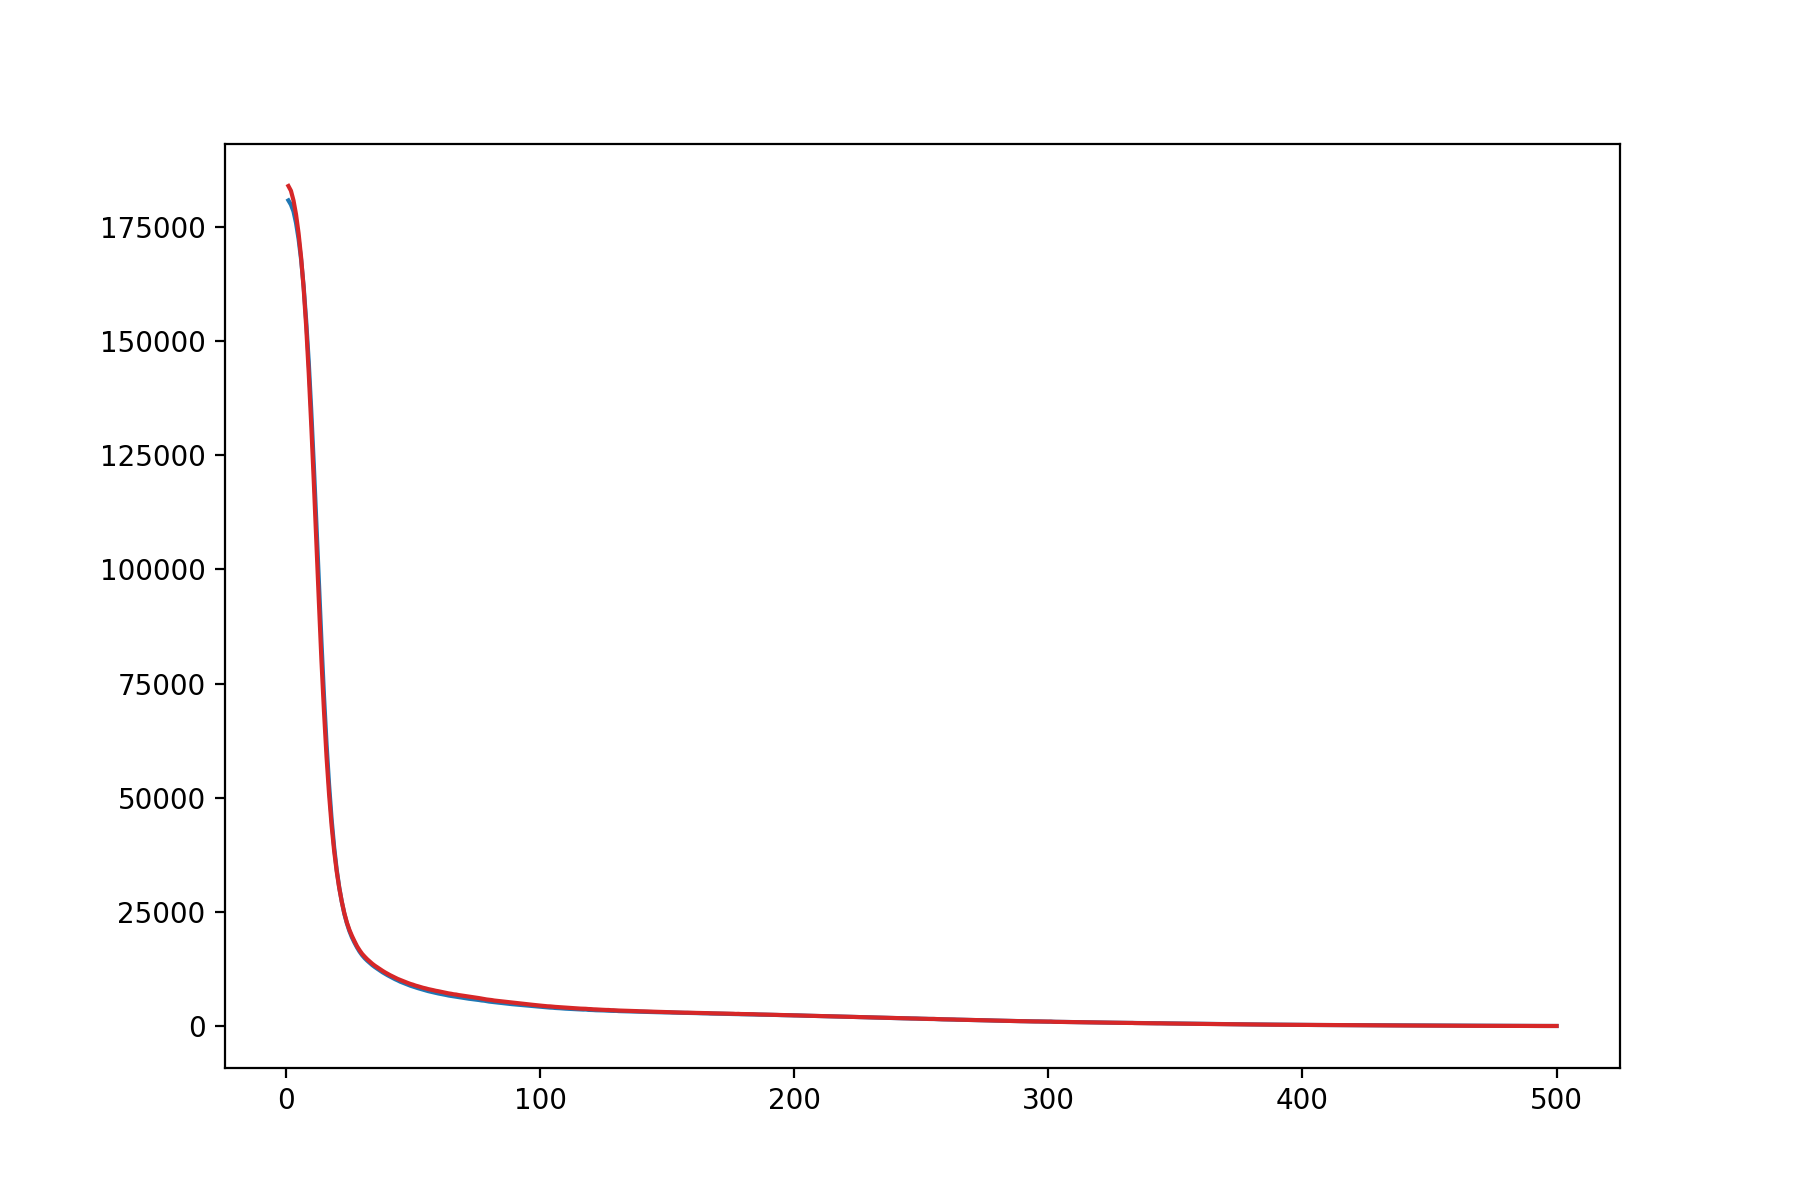

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(range(1, n_epochs + 1), history.history["loss"], c="tab:blue")
ax.plot(range(1, n_epochs + 1), history.history["val_loss"], c="tab:red")
plt.show()